## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
from keras.datasets import cifar10

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0 :
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(input_layer)
        else :
            x = keras.layers.Dense(units = n_units, activation = "relu", name = "hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs = [out])
    return model

In [6]:
"""Code Here
設定超參數
"""
Learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]
epochs = 50
batch_size = 256
momentum = 0.5

In [9]:
import tensorflow as tf
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for lr in Learning_rate:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    opt = tf.keras.optimizers.SGD(lr=lr, nesterov=False, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer = opt )
    
    model.fit(x_train,y_train,
             epochs=epochs,
             batch_size =batch_size,
             validation_data=(x_test,y_test),
             shuffle=True)
    # 將訓練結果儲存在 Dictionary
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\TB890239\Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss: 1.9999 - accuracy: 0.2727 - val_loss: 2.0442 - val_accuracy: 0.2787
Epoch 2/50
196/196 [==============================] - 4s 20ms/step - loss: 1.7644 - accuracy: 0.3667 - val_loss: 1.7136 - val_accuracy: 0.3956
Epoch 3/50
196/196 [==============================] - 4s 19ms/step - loss: 1.7201 - accuracy: 0.3843 - val_loss: 1.8524 - val_accuracy: 0.3378
Epoch 4/50
196/196 [==============================] - 6s 28ms/step - loss: 1.6292 - accuracy: 0.4184 - val_loss: 1.6734 - val_accuracy: 0.3908
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5809 - accuracy: 0.4352 - val_loss: 1.6801 - val_accuracy: 0.4115
Epoch 6/50
196/196 [==============================] - 4s 21ms/step - loss: 1.5274 - accuracy: 0.4551 - val_loss: 1.8510 - val_accuracy: 0.3559
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5112 - accuracy: 0.4628 - val_loss: 1.4815 - val_accuracy: 0.4685

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 1.9854 - accuracy: 0.2919 - val_loss: 1.8637 - val_accuracy: 0.3342
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 1.8044 - accuracy: 0.3637 - val_loss: 1.8010 - val_accuracy: 0.3585
Epoch 3/50
196/196 [==============================] - 4s 23ms/step - loss: 1.7281 - accuracy: 0.3867 - val_loss: 1.7350 - val_accuracy: 0.3872
Epoch 4/50
196/196 [==============================] - 4s 23ms/step - loss: 1.6786 - accuracy: 0.4055 - val_loss: 1.7010 - val_accuracy: 0.3995
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 1.6349 - accuracy: 0.4232 - val_loss: 1.7024 - val_accuracy: 0.3970
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 1.5988 - accuracy: 0.4343 - val_loss: 1.6068 - val_accuracy: 0.4231
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 1.5695 - accuracy: 0.4472 - val_loss: 1.6393 - val_accuracy: 0.4152

Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 2.2575 - accuracy: 0.1747 - val_loss: 2.1984 - val_accuracy: 0.2388
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 2.1548 - accuracy: 0.2582 - val_loss: 2.1097 - val_accuracy: 0.2768
Epoch 3/50
196/196 [==============================] - 5s 25ms/step - loss: 2.0693 - accuracy: 0.2925 - val_loss: 2.0299 - val_accuracy: 0.3112
Epoch 4/50
196/196 [==============================] - 4s 23ms/step - loss: 1.9987 - accuracy: 0.3139 - val_loss: 1.9734 - val_accuracy: 0.3196
Epoch 5/50
196/196 [==============================] - 4s 23ms/step - loss: 1.9488 - accuracy: 0.3299 - val_loss: 1.9321 - val_accuracy: 0.3329
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 1.9135 - accuracy: 0.3409 - val_loss: 1.9017 - val_accuracy: 0.3438
Epoch 7/50
196/196 [==============================] - 5s 23ms/step - loss: 1.8865 - accuracy: 0.3484 - val_loss: 1.8789 - val_accuracy: 0.3497

Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3188 - accuracy: 0.1313 - val_loss: 2.2962 - val_accuracy: 0.1486
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 2.2812 - accuracy: 0.1659 - val_loss: 2.2699 - val_accuracy: 0.1795
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 2.2589 - accuracy: 0.1880 - val_loss: 2.2503 - val_accuracy: 0.1919
Epoch 4/50
196/196 [==============================] - 4s 23ms/step - loss: 2.2407 - accuracy: 0.1990 - val_loss: 2.2333 - val_accuracy: 0.1973
Epoch 5/50
196/196 [==============================] - 4s 23ms/step - loss: 2.2244 - accuracy: 0.2030 - val_loss: 2.2179 - val_accuracy: 0.2043
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 2.2097 - accuracy: 0.2085 - val_loss: 2.2040 - val_accuracy: 0.2075
Epoch 7/50
196/196 [==============================] - 4s 23ms/step - loss: 2.1964 - accuracy: 0.2112 - val_loss: 2.1913 - val_accuracy: 0.2142

Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3479 - accuracy: 0.1173 - val_loss: 2.3457 - val_accuracy: 0.1211
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 2.3402 - accuracy: 0.1196 - val_loss: 2.3384 - val_accuracy: 0.1235
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 2.3334 - accuracy: 0.1232 - val_loss: 2.3318 - val_accuracy: 0.1250
Epoch 4/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3273 - accuracy: 0.1259 - val_loss: 2.3259 - val_accuracy: 0.1289
Epoch 5/50
196/196 [==============================] - 5s 23ms/step - loss: 2.3218 - accuracy: 0.1292 - val_loss: 2.3206 - val_accuracy: 0.1313
Epoch 6/50
196/196 [==============================] - 4s 23ms/step - loss: 2.3169 - accuracy: 0.1316 - val_loss: 2.3158 - val_accuracy: 0.1330
Epoch 7/50
196/196 [==============================] - 5s 25ms/step - loss: 2.3124 - accuracy: 0.1342 - val_loss: 2.3115 - val_accuracy: 0.1352

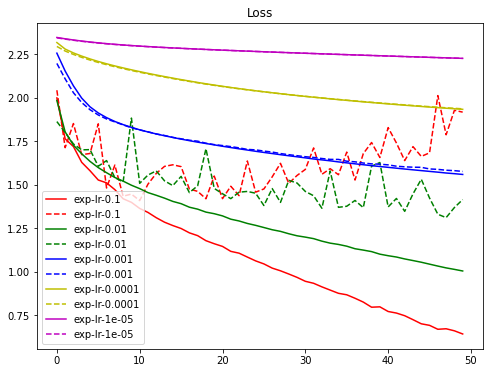

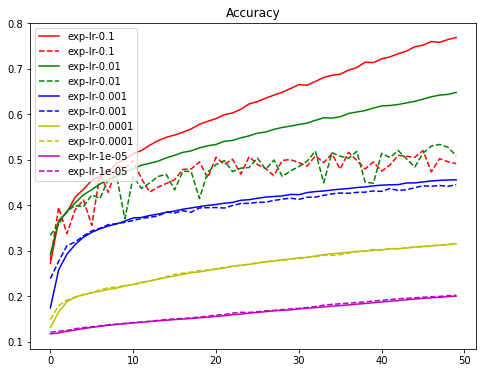

In [10]:
# 將結果畫出來
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [11]:
# 使用 nesterov 與否的表現沒有太大差異
# momentum 0.95跟 momentum 0.5 的差異: 1.momentum越大似乎會Overfitting的越厲害 2.用0.95的momentum時是lr=0.01訓練Acu最高, 而0.5時的是lr=0.1的最高